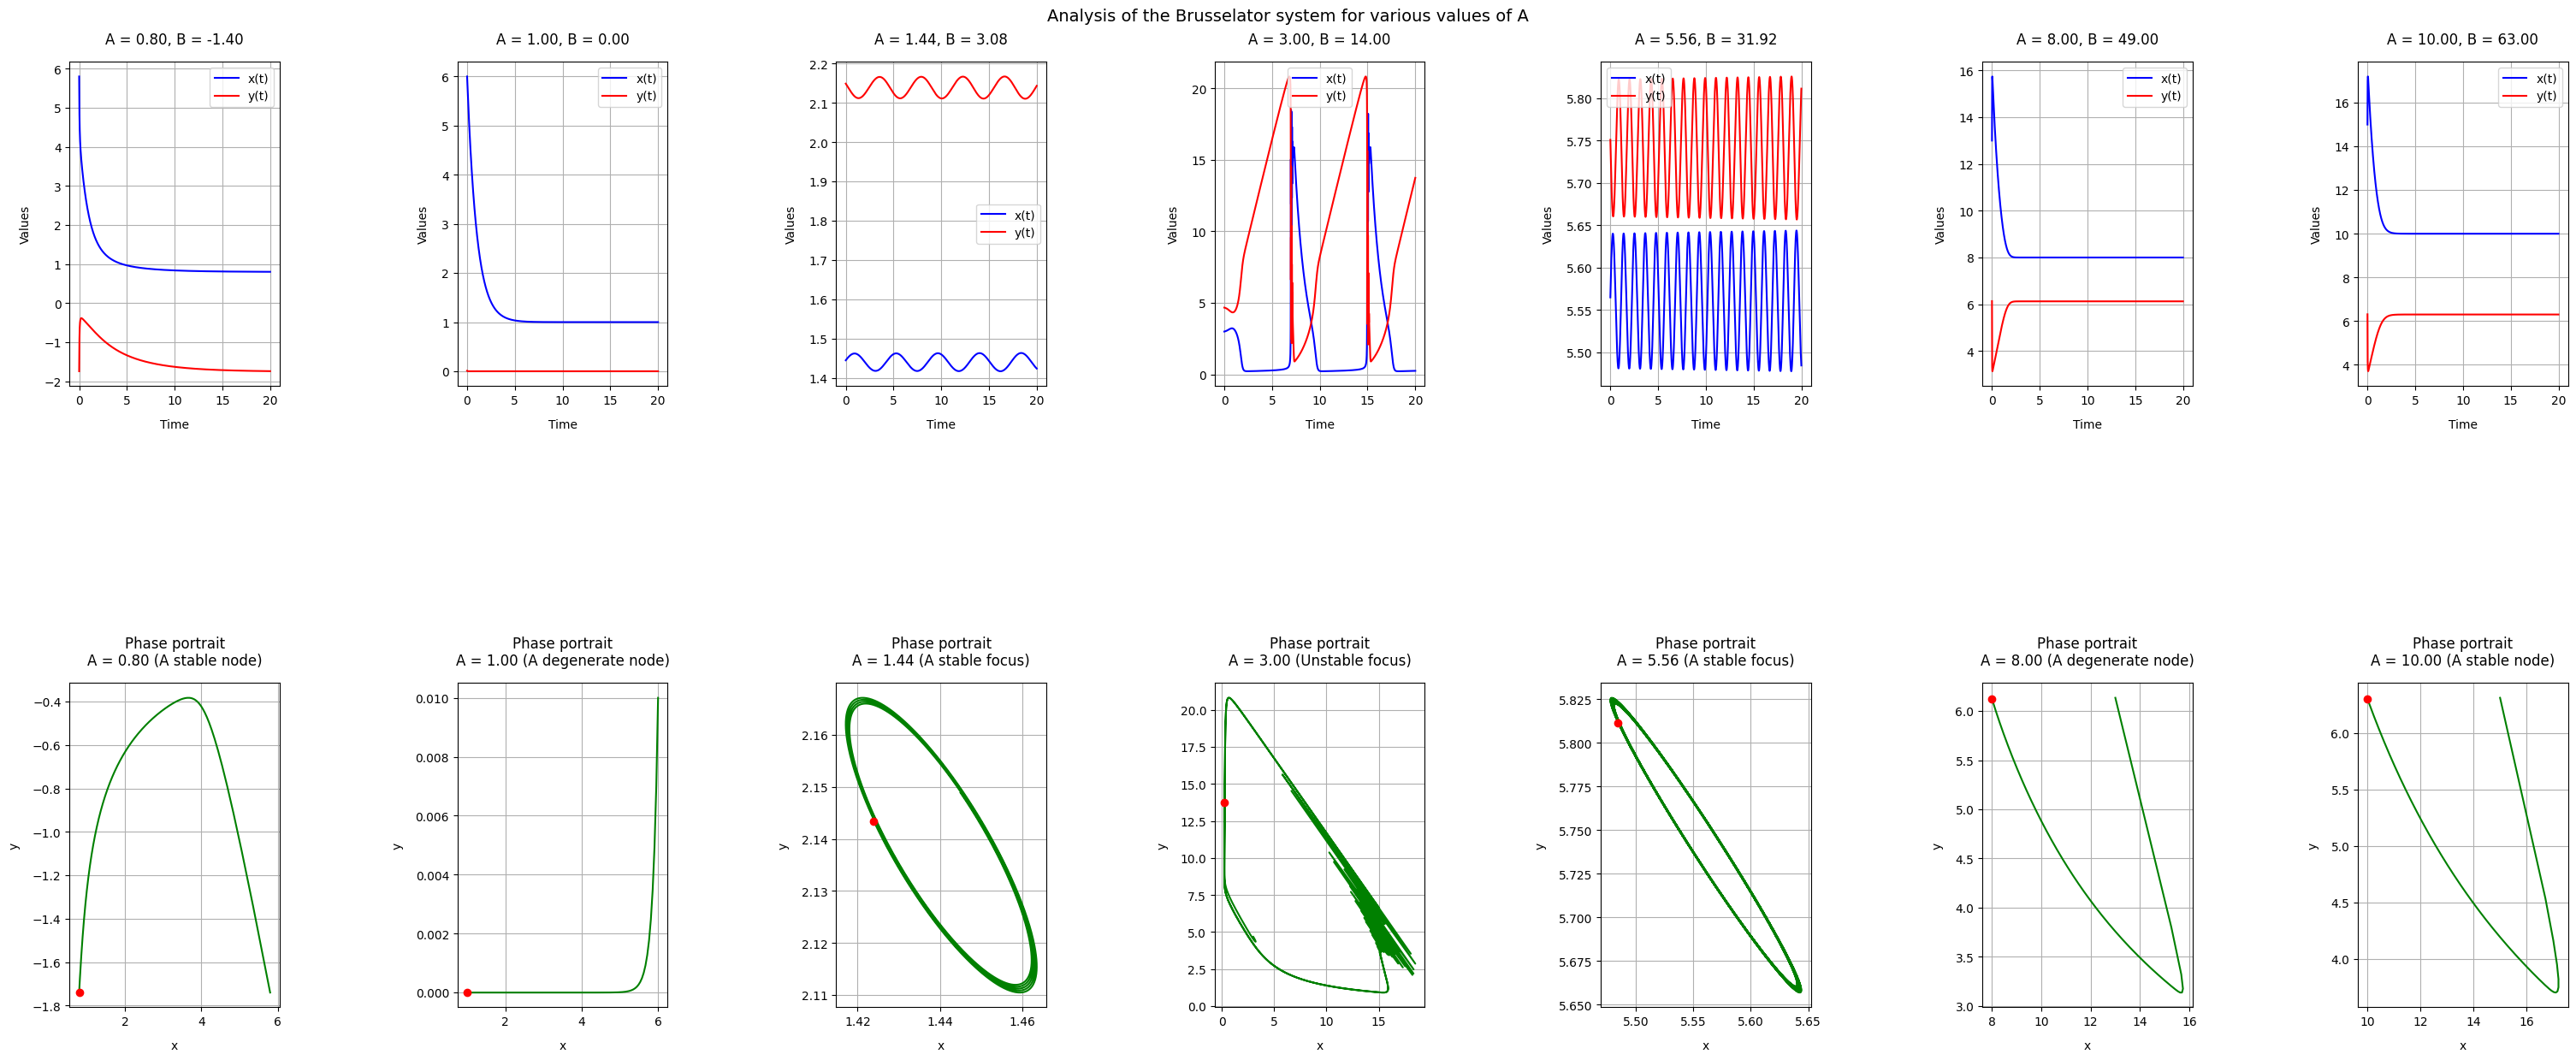

<ipython-input-20-c261eb6a12e5>:98: RuntimeWarning: divide by zero encountered in scalar divide
  x0, y0 = A+5, B/A + 0.01
<ipython-input-20-c261eb6a12e5>:16: RuntimeWarning: invalid value encountered in scalar add
  k2x, k2y = sistem_brusselator(x[i]+0.5*dt*k1x, y[i]+0.5*dt*k1y, A, B)
<ipython-input-20-c261eb6a12e5>:7: RuntimeWarning: overflow encountered in scalar power
  dxdt = A - (B + 1)*x + x**2*y
<ipython-input-20-c261eb6a12e5>:8: RuntimeWarning: overflow encountered in scalar power
  dydt = B*x - x**2*y
<ipython-input-20-c261eb6a12e5>:7: RuntimeWarning: invalid value encountered in scalar add
  dxdt = A - (B + 1)*x + x**2*y
<ipython-input-20-c261eb6a12e5>:8: RuntimeWarning: invalid value encountered in scalar subtract
  dydt = B*x - x**2*y
<ipython-input-20-c261eb6a12e5>:7: RuntimeWarning: overflow encountered in scalar multiply
  dxdt = A - (B + 1)*x + x**2*y
<ipython-input-20-c261eb6a12e5>:8: RuntimeWarning: overflow encountered in scalar multiply
  dydt = B*x - x**2*y
<ipyth

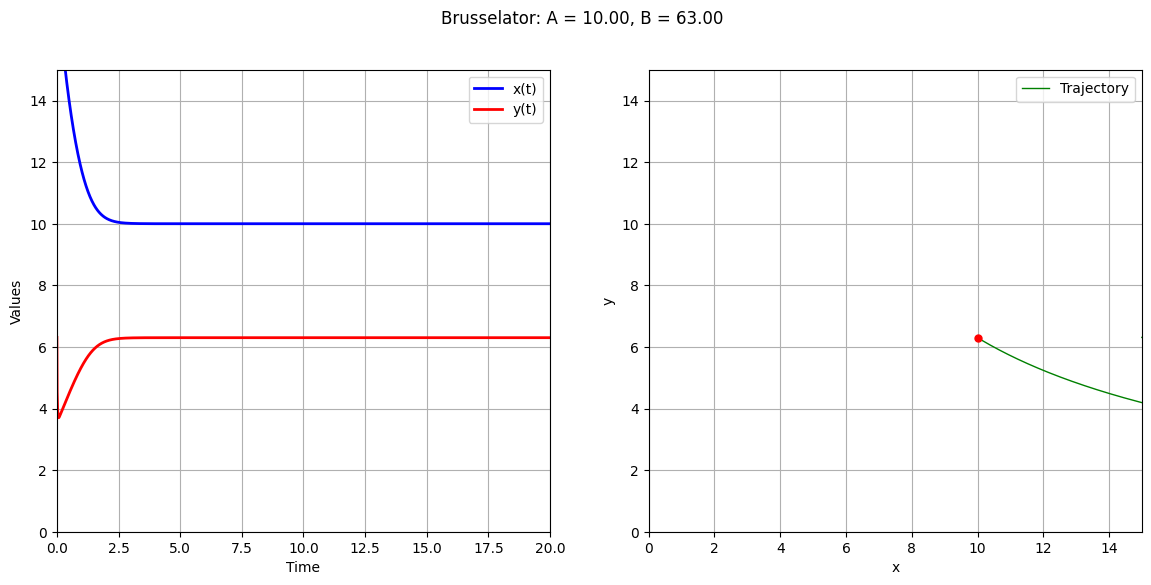

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def sistem_brusselator(x, y, A, B):
    dxdt = A - (B + 1)*x + x**2*y
    dydt = B*x - x**2*y
    return dxdt, dydt

def rk4(x0, y0, A, B, dt, steps):
    x, y = np.zeros(steps+1), np.zeros(steps+1)
    x[0], y[0] = x0, y0
    for i in range(steps):
        k1x, k1y = sistem_brusselator(x[i], y[i], A, B)
        k2x, k2y = sistem_brusselator(x[i]+0.5*dt*k1x, y[i]+0.5*dt*k1y, A, B)
        k3x, k3y = sistem_brusselator(x[i]+0.5*dt*k2x, y[i]+0.5*dt*k2y, A, B)
        k4x, k4y = sistem_brusselator(x[i]+dt*k3x, y[i]+dt*k3y, A, B)
        x[i+1] = x[i] + (dt/6)*(k1x + 2*k2x + 2*k3x + k4x)
        y[i+1] = y[i] + (dt/6)*(k1y + 2*k2y + 2*k3y + k4y)
    return x, y

# params
dt = 0.01
steps = 2000
t = np.linspace(0, steps*dt, steps+1)
A_cases = [0.8, 1.0, 1.44, 3.0, 5.56, 8.0, 10.0]  # Critical values
fig = plt.figure(figsize=(30, 12), constrained_layout=True)
gs = fig.add_gridspec(2, 7, hspace=0.4, wspace=0.3)
for i, A in enumerate(A_cases):
    B = 7*(A-1)
    if A < 1.44 or A > 5.56:
        x0, y0 = A+5, B/A + 0.01
    else:
        x0, y0 = A+0.005, B/A + 0.01
    x, y = rk4(x0, y0, A, B, dt, steps)
    ax1 = fig.add_subplot(gs[0, i])
    ax1.plot(t, x, 'b', label='x(t)')
    ax1.plot(t, y, 'r', label='y(t)')
    ax1.set_title(f'A = {A:.2f}, B = {B:.2f}', pad=15)
    ax1.set_xlabel('Time', labelpad=10)
    ax1.set_ylabel('Values', labelpad=10)
    ax1.legend()
    ax1.grid(True)
    ax2 = fig.add_subplot(gs[1, i])
    ax2.plot(x, y, 'g')
    ax2.plot(x[-1], y[-1], 'ro')
    if 0 < A < 1:
        point_type = "A stable node"
    elif A == 1.0:
        point_type = "A degenerate node"
    elif 1.0 < A < 1.44:
        point_type = "Unstable focus"
    elif 1.44 < A < 5.56:
        point_type = "Unstable focus"
    elif A == 8.0:
        point_type = "A degenerate node"
    elif A > 8.0:
        point_type = "A stable node"
    else:
        point_type = "A stable focus"
    ax2.set_title(f'Phase portrait\nA = {A:.2f} ({point_type})',fontsize=12, pad=15)
    ax2.set_xlabel('x', labelpad=10)
    ax2.set_ylabel('y', labelpad=10)
    ax2.grid()
plt.suptitle('Analysis of the Brusselator system for various values of A', y=1.02, fontsize=14)
plt.show()

#Animation
A_values = np.linspace(0.0, 10.0, 100)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
line1, = ax1.plot([], [], 'b', lw=2, label='x(t)')
line2, = ax1.plot([], [], 'r', lw=2, label='y(t)')
phase, = ax2.plot([], [], 'g', lw=1, label='Trajectory')
point, = ax2.plot([], [], 'ro', ms=5)
ax1.set_xlim(0, steps*dt)
ax1.set_ylim(0, 15)
ax1.set_xlabel('Time')
ax1.set_ylabel('Values')
ax1.legend()
ax1.grid()
ax2.set_xlim(0, 15)
ax2.set_ylim(0, 15)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend()
ax2.grid()
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    phase.set_data([], [])
    point.set_data([], [])
    return line1, line2, phase, point
def update(frame):
    A = A_values[frame]
    B = 7*(A-1)
    if A < 1.44 or A > 5.56:
        x0, y0 = A+5, B/A + 0.01
    else:
        x0, y0 = A+0.005, B/A + 0.01
    x, y = rk4(x0, y0, A, B, dt, steps)
    line1.set_data(t, x)
    line2.set_data(t, y)
    phase.set_data(x, y)
    point.set_data([x[-1]], [y[-1]])
    fig.suptitle(f'Brusselator: A = {A:.2f}, B = {B:.2f}')
    return line1, line2, phase, point
ani = FuncAnimation(fig, update, frames=len(A_values),
                    init_func=init, blit=True, interval=150)

HTML(ani.to_jshtml())